## Machine Learning Classifiers for distinguishing different Iris flower species

In [1]:
#importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Loading Dataset

In [2]:
# we need to load the iris flower data set, we can import from sklearn library
from sklearn.datasets import load_iris
data = load_iris()

# converting data into a panda's compatible dataframe
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df['targets'] = pd.Series(data.target)

## Splitting data into Train and Test splits

In [3]:
# splitting data into training and test sets 
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split 

X =['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y = 'targets'

X_train, X_test, y_train, y_test = train_test_split(iris_df[X], iris_df[y], test_size=0.25, random_state=0)


In [4]:
# import important metrics from sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Naive Bayes Classifier

In [5]:
# using naive bayes classifier, importing Gaussian Naive bayes classifier
from sklearn.naive_bayes import GaussianNB

# calling an instantiation 
gnb = GaussianNB()

# training the naive bayes model 
gnb.fit(X_train, y_train)

# predicting the class labels on the test data 
y_predict = gnb.predict(X_test)
y_train_predict = gnb.predict(X_train)

# we can check the accuracy of our model
print('The test accuracy of the naive bayes classifier is {:.2f}%'.format(accuracy_score(y_test, y_predict)*100))

The test accuracy of the naive bayes classifier is 100.00%


In [6]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



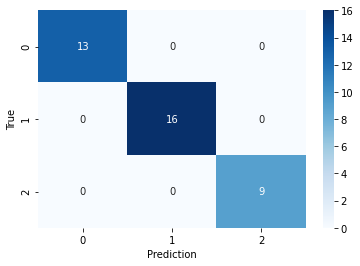

In [7]:
# we can also make a confusion matrix to better know about our model decisions 
cm_gnb = confusion_matrix(y_test, y_predict)
df_cm_gnb = pd.DataFrame(cm_gnb, columns=np.unique(y_test), index=np.unique(y_predict))

df_cm_gnb.index.name = 'True'
df_cm_gnb.columns.name = 'Prediction'

sns.heatmap(df_cm_gnb, annot=True, cmap = 'Blues')
plt.show()

Gaussian Naive Bayes classifier correctly classifies all the species into their respective classes. 

## Scaling Data (pre-processing)

Logistic regression is a linear model and assumes that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

We know from the exploratory data analysis that petal length and petal width are bimodal distribution and do not behave like a normal distribution. Before applying some models to the training data we can scale the data. 

In [8]:
# importing standard scaler from preprocessing 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Logistic Regression

In [9]:
# importing classifier from linear models 
from sklearn.linear_model import LogisticRegression

# making an instantiation for the model
lr = LogisticRegression()

# training the model
lr.fit(X_train, y_train)

# prediting target labels for the new test data
y_predict = lr.predict(X_test)

# printing the accuracy of the model 
print('Logistic Regression test accuracy: {:0.2f}%'.format(accuracy_score(y_test, y_predict)*100))

Logistic Regression test accuracy: 97.37%


In [10]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



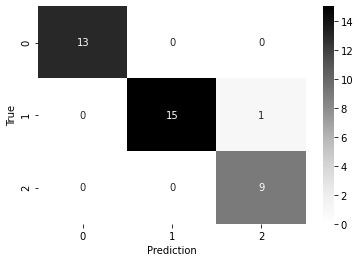

In [11]:
# we can also make a confusion matrix to better know about our model decisions 
cm_lr = confusion_matrix(y_test, y_predict)
df_cm_lr = pd.DataFrame(cm_lr, columns=np.unique(y_test), index=np.unique(y_predict))

df_cm_lr.index.name = 'True'
df_cm_lr.columns.name = 'Prediction'

sns.heatmap(df_cm_lr, annot=True, cmap = 'Greys')
plt.show()

Gaussian NB Classifier wrongly classifies 5 data points into virginica class although they belong to versicolor species. But with Logistic Regression that problem has solved alot and now logistic regression is making only one misclassification error as we can see from the confusion matrix.

## KNN (K-Nearest Neighbours)

In [12]:
# importing KNN classifier from sklearn 
from sklearn.neighbors import KNeighborsClassifier

# The default hyperparameter configuration are: neighbors=5, weights=uniform, metric=minkowski
knn = KNeighborsClassifier() 

knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
                        
# printing the accuracy of the model 
print('KNN test accuracy: {:0.2f}%'.format(accuracy_score(y_test, y_predict)*100))

KNN test accuracy: 94.74%


In [13]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.88      0.93        16
           2       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



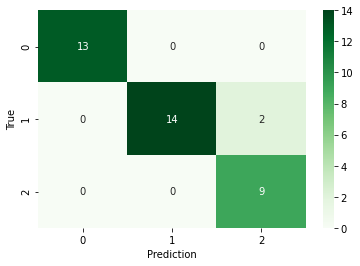

In [14]:
# we can also make a confusion matrix to better know about our model decisions 
cm_knn = confusion_matrix(y_test, y_predict)
df_cm_knn = pd.DataFrame(cm_knn, columns=np.unique(y_test), index=np.unique(y_predict))

df_cm_knn.index.name = 'True'
df_cm_knn.columns.name = 'Prediction'

sns.heatmap(df_cm_knn, annot=True, cmap = 'Greens')
plt.show()

KNN misclassifies 2 datapoints in virginica class although they belong to versicolor specie. But we can improve the accuracy of the KNN algorithm by tuning the hyperparameters. We can use Grid search algorithm to choose the best hyperparameter combination. 

## Improving KNN algorithm by Hyperparameter Tuning using Grid Search Algorithm 

In [15]:
# importing required function from sklearn lib 
from sklearn.model_selection import GridSearchCV

# putting hyperparameter values into a dictionary 
knn_grid= {
    'n_neighbors': [5, 7, 9, 11, 15],
    'weights':['distance', 'uniform'],
    'metric':['minkowski', 'euclidean', 'manhattan']
}

# setup random hyperparameter for gridsearch
knn_gs = GridSearchCV(knn, knn_grid, cv=5, verbose=0)

# training the model on one of the best hyperparameter
knn_gs.fit(X_train, y_train)

# printing the best hyperparameters
print('The best hyperparamets selection is:', knn_gs.best_params_)

# prediting target labels for the new test data
y_predict = knn_gs.predict(X_test)

# printing the accuracy of the model 
print('KNN test accuracy with best searched hyperparameter: {:0.2f}%'.format(accuracy_score(y_test, y_predict)*100))

The best hyperparamets selection is: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
KNN test accuracy with best searched hyperparameter: 94.74%


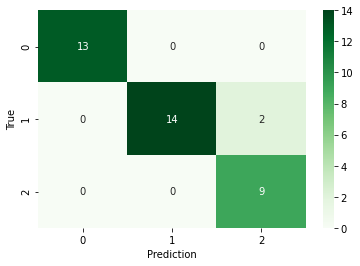

In [16]:
# we can also make a confusion matrix to better know about our model decisions 
cm_knn = confusion_matrix(y_test, y_predict)
df_cm_knn = pd.DataFrame(cm_knn, columns=np.unique(y_test), index=np.unique(y_predict))

df_cm_knn.index.name = 'True'
df_cm_knn.columns.name = 'Prediction'

sns.heatmap(df_cm_knn, annot=True, cmap = 'Greens')
plt.show()

**We are unable to improve the test accuracy of the KNN model even after choosing best hyperparameter selection**

## Support Vector Machines (SVM)

In [17]:
# import model from sklearn 
from sklearn.svm import SVC

svm_grid = {
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001], 
    'kernel':['rbf', 'linear', 'poly']
} 

svm = GridSearchCV(SVC(probability=True), svm_grid, verbose=0)

# training the model on one of the best hyperparamete
svm.fit(X_train, y_train)

# printing the best hyperparameters
print('The best hyperparamets selection is:', svm.best_params_)

# prediting target labels for the new test data
y_predict = svm.predict(X_test)

# printing the accuracy of the model 
print('SVM test accuracy: {:0.2f}%'.format(accuracy_score(y_test, y_predict)*100))

The best hyperparamets selection is: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVM test accuracy: 89.47%


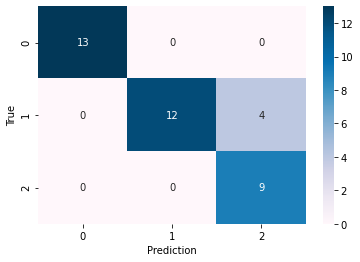

In [18]:
# we can also make a confusion matrix to better know about our model decisions 
cm_svm = confusion_matrix(y_test, y_predict)
df_cm_svm = pd.DataFrame(cm_svm, columns=np.unique(y_test), index=np.unique(y_predict))

df_cm_svm.index.name = 'True'
df_cm_svm.columns.name = 'Prediction'

sns.heatmap(df_cm_svm, annot=True, cmap = 'PuBu')
plt.show()

Linear SVM is performing even worse it is because **versicolor** and **virginica** datapoints are not linearly separable. We can use any other kernel, such as RBF kernet but it is giving lower accuracy than the linear kernel. 

## Decision Trees

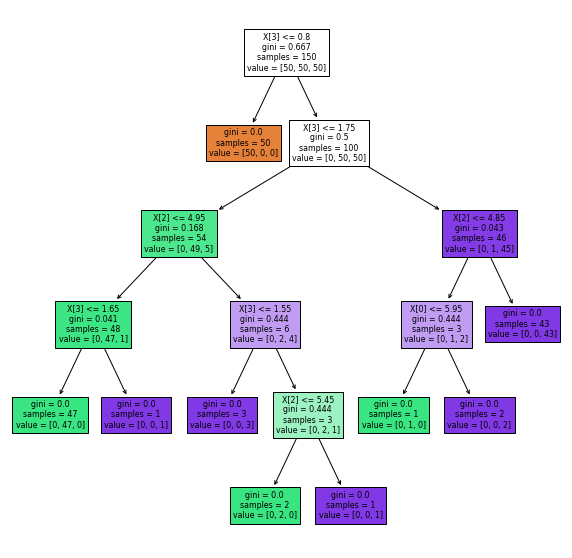

In [19]:
 # import the required model from sklearn 
from sklearn.tree import DecisionTreeClassifier, plot_tree

features = iris_df.iloc[:, :4] # choosing all of the features
target = iris_df.iloc[:, 4] # choosing target labels

# Apply the decision tree classifier model to the data using all four parameters at once.
dt = DecisionTreeClassifier().fit(features, target)

# once the model is trained, we can also plot a tree-plot
plt.figure(figsize=(10, 10))
plot_tree(dt, filled=True)
plt.show()

In decision trees, hyperparameters such as **max_depth**, **min_impurity_decrease** can be set to control the efficiency of the algorithm. 
In the below code, we will set the max_depth to 3 and will look at the effect of this.

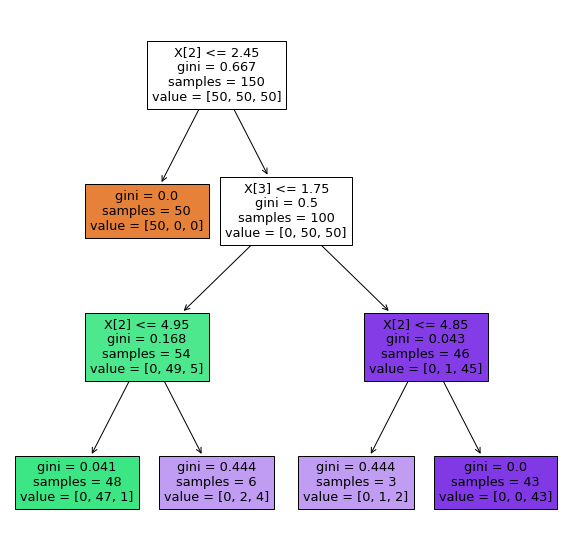

In [20]:
# Apply the decision tree classifier to train the model, but with a max depth of 3
model = DecisionTreeClassifier(max_depth=3).fit(features, target)

# once the model is trained, we can also plot a tree-plot
plt.figure(figsize=(10, 10))
plot_tree(model, filled=True)
plt.show()

If there are many important features then evaluating decision tree until a pure splits achieves takes longer to finish the algorithm. 

By choosing max_depth=3, algorithm is making 4 misclassifications. Another hyperparameter which we can tweak can be min_impurity_decrease. Lets choose its value to 0.01.

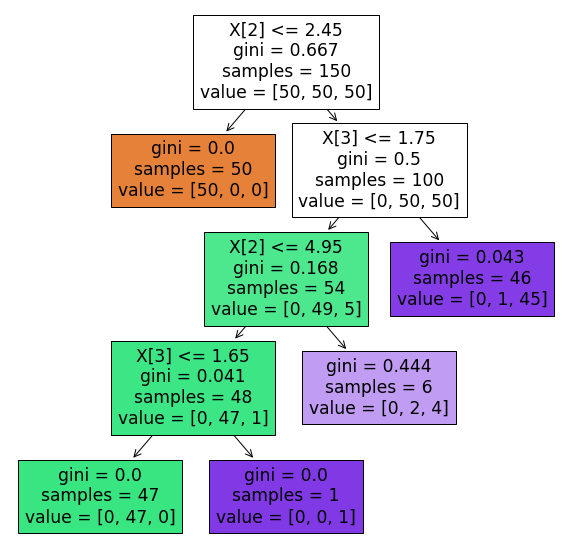

In [21]:
# Apply the model to the data as before, but with a minimum impurity decrease of 0.01
model = DecisionTreeClassifier(min_impurity_decrease=0.01).fit(features, target)

# once the model is trained, we can also plot a tree-plot
plt.figure(figsize=(10, 10))
plot_tree(model, filled=True)
plt.show()

This approach just give us 3 misclassification data points. 

## Random Forest

In [22]:
# first to import the classifier from sklearn 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=4, random_state=0)

rf.fit(X_train, y_train)

y_predict = rf.predict(X_test)

print('Random Forest Classifier test accuracy: {:0.2f}%'.format(accuracy_score(y_test, y_predict)*100))

Random Forest Classifier test accuracy: 94.74%


In [23]:
# we can check the other scores
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.88      0.93        16
           2       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



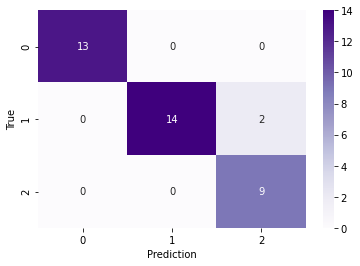

In [24]:
# we can also make a confusion matrix to better know about our model decisions 
cm_rf = confusion_matrix(y_test, y_predict)
df_cm_rf = pd.DataFrame(cm_rf, columns=np.unique(y_test), index=np.unique(y_predict))

df_cm_rf.index.name = 'True'
df_cm_rf.columns.name = 'Prediction'

sns.heatmap(df_cm_rf, annot=True, cmap = 'Purples')
plt.show()

Random Forest Classifier is only making 2 misclassification errors and incorrectly classifies 2 datapoints in virginica class although originally it belongs to the versicolor class. 

## Feature Importance

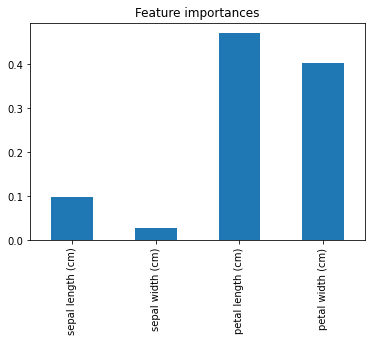

In [25]:
rf.feature_importances_
feature_dict = dict(zip(iris_df.columns, rf.feature_importances_))
feature_df = pd.DataFrame(feature_dict, index=[0])

# visualize feature importance on a bar plot 
feature_df.T.plot.bar(title='Feature importances', legend=False)
plt.show()

**petal length** and **petal width** are the most important features on the basis of we can classify iris species into their respective classes. Moreover we can also observe from the above decision tree diagram that it has also selected these two features to get the pure splits at the leaf nodes.  

## Summary

Logistic Regression, K-Nearest Neighbors and Random Forest is working best in classifing almost all of the datapoints to their respective classes.    